# Parte 1: Mapa CMB

In [25]:
import numpy as np 
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from astropy.units import deg
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2, ifft2
from numpy import random
from scipy import signal

### Espectro Original

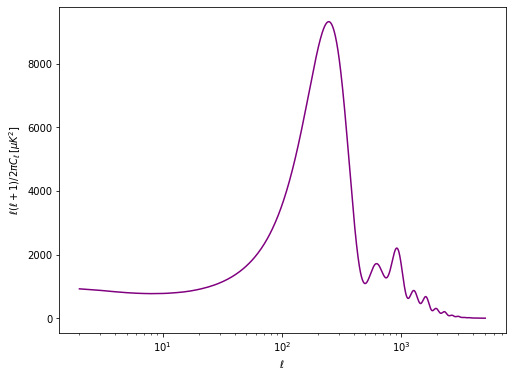

In [2]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
plt.figure(figsize=(8,6))
plt.plot(data['x'], data['y'],color="purple")
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
plt.savefig('spectrum_original.png')

### Mapa Real

In [3]:
df = pd.read_csv('D_ell.csv')
col1 = df.ell
col2 = df.D_ell
#col2[0]
#col1[0]

d = (col1 + 1)*col1
#print(d)
c_ell = col2 / (d/(2*pi))
C_ell = round(c_ell,10)
#C_ell

In [44]:
def M_ell(x,y):
    rows = 801
    columns = 801
    #n = 0
    #x = 2
    #y = 2
    a=[[0 for i in range(-400, 401, 1)]for j in range(-400, 401, 1)]
    matrix = []
    for i in range(-400, 401, 1):
        sub = []
        #print(i)
        for j in range(-400, 401, 1):
            #print(j)
            if round(np.sqrt(i**2 + j**2))<=400:
                #print(np.sqrt(i**2 + j**2))
                #modulo = round(np.sqrt(i**2 + j**2))
                #print(modulo)
                #mod = round(modulo)
                #print(round(np.sqrt(i**2 + j**2)))
                n = a[i][j] = C_ell[round(np.sqrt(i**2 + j**2))]
            else:
                n = a[i][j] = 0
            #print(i,j)
            #print(a[i][j])
                #matrix.append(sub)
            sub.append(n)
        matrix.append(sub)
    return matrix #np.array(matrix)



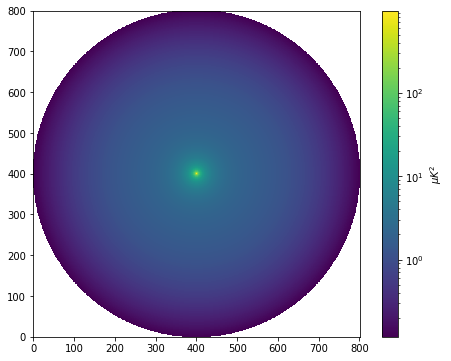

<Figure size 432x288 with 0 Axes>

In [51]:
x = np.linspace(-400,401,801)
y = np.linspace(-400,401,801)
plt.figure(figsize=(8,6))
#plt.xlim(-100, 100)
plt.ylim(0, 800)
#plt.ylim(0, 10100)
#plt.xlabel('$\ell$')
#plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
image = plt.imshow(M_ell(x,y), norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label('$\mu K^2$', rotation=90)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('M_tilde.png', dpi=100)

### Mapa en espacio de Fourier

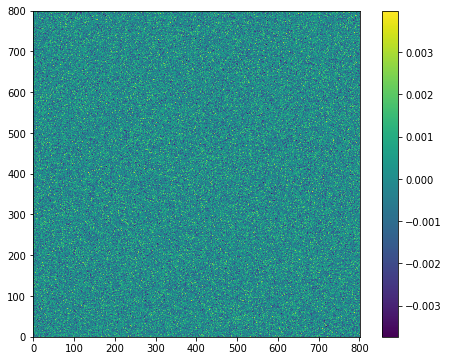

<Figure size 432x288 with 0 Axes>

In [62]:
mu, sigma = 0, 1 # mean and standard deviation
X = np.random.normal(mu, sigma, size=(801, 801))
G_ell = np.fft.ifft2(X)

plt.figure(figsize=(8,6))
plt.ylim(0,800)
plt.imshow(G_ell.real)
plt.colorbar()
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('G_ell.png', dpi=100)

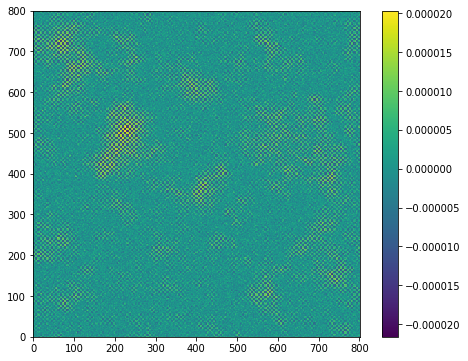

<Figure size 432x288 with 0 Axes>

In [64]:
Y = M_ell(x, y)*G_ell
M_theta = np.fft.ifft2(Y)

plt.figure(figsize=(8,6))
plt.ylim(0,800)
plt.imshow(M_theta.real)
plt.colorbar()
cbar.set_label('$Temperatura [\mu K]$', rotation=90)
#plt.clim(-400, 400);
fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('M_tetha.png', dpi=100)

# Parte 2: Espectro de Potencias

### Apodización

Text(0.5, 0, 'Sample')

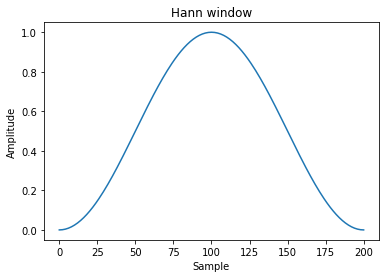

In [28]:
window = signal.hann(201) #el número de adentro corresponde al número de muestras #debe ser del mismo tamaño que M(theta_x,theta_y)
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

/home/cony/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


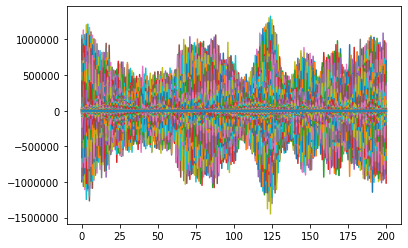

In [30]:
M_apod = np.multiply(M_theta,window)
plt.plot(M_apod)

### Espectro de Potencias

In [ ]:
M_tilde2 = np.fft.fft2(M_apod)

In [ ]:
C_ell2 = 

#### Corrección del sesgo